In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Check shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)


In [22]:
# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [23]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


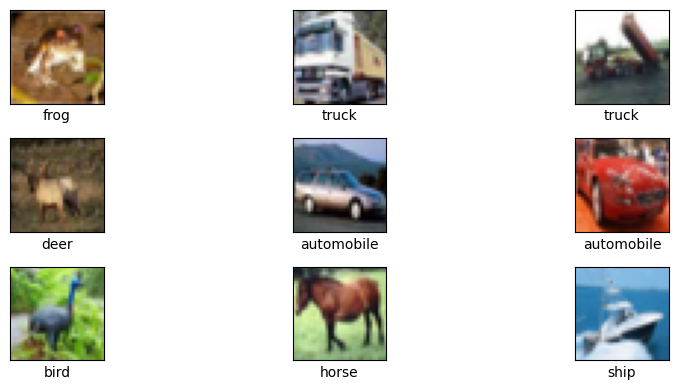

In [24]:
# Show first 9 training images
plt.figure(figsize=(10, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()


In [25]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


C:\Users\ADARSH\anaconda3\envs\DEEP_LEARNING\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.1)


Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3541 - loss: 1.7529 - val_accuracy: 0.5664 - val_loss: 1.2135
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5751 - loss: 1.1927 - val_accuracy: 0.6176 - val_loss: 1.1061
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6422 - loss: 1.0123 - val_accuracy: 0.6220 - val_loss: 1.0861
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6847 - loss: 0.8982 - val_accuracy: 0.6856 - val_loss: 0.9074
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7082 - loss: 0.8315 - val_accuracy: 0.6632 - val_loss: 0.9829
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7340 - loss: 0.7637 - val_accuracy: 0.7112 - val_loss: 0.8243
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7591 - loss: 0.6862 - val_accuracy: 0.7088 - val_loss: 0.8312
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7735 -

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6902 - loss: 2.7827 
Test Accuracy: 0.6884999871253967


In [29]:
model.save("cifar10_cnn_model.h5")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


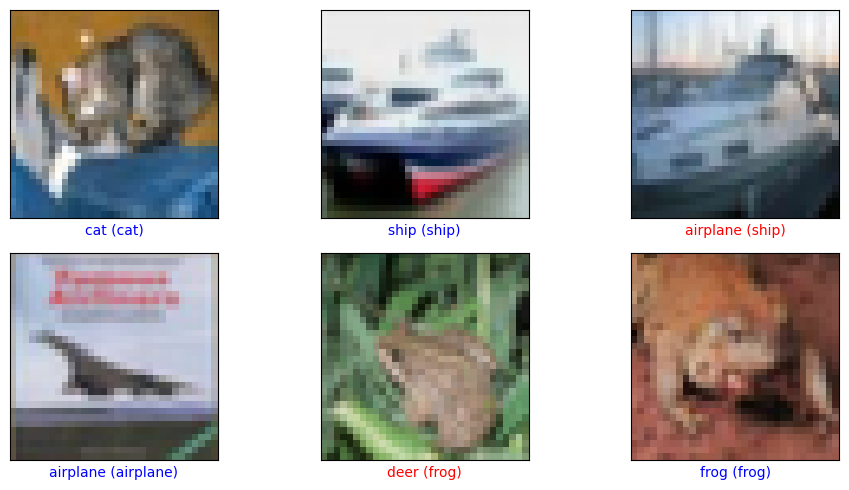

In [30]:
# Predict on test set
predictions = model.predict(x_test)

# Function to plot images with prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array[i])
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# Show predictions
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()


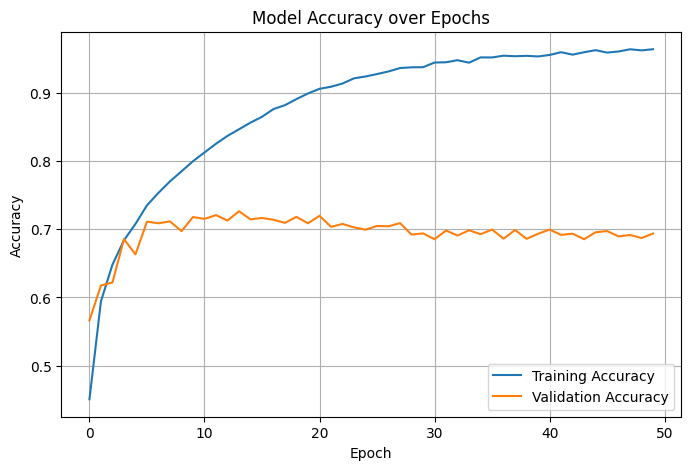

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


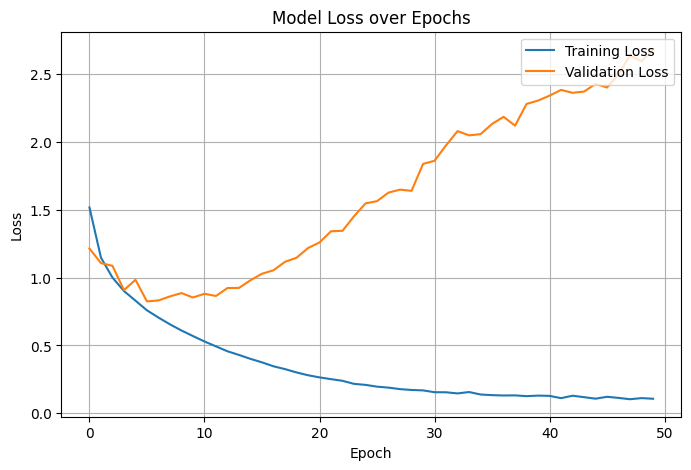

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


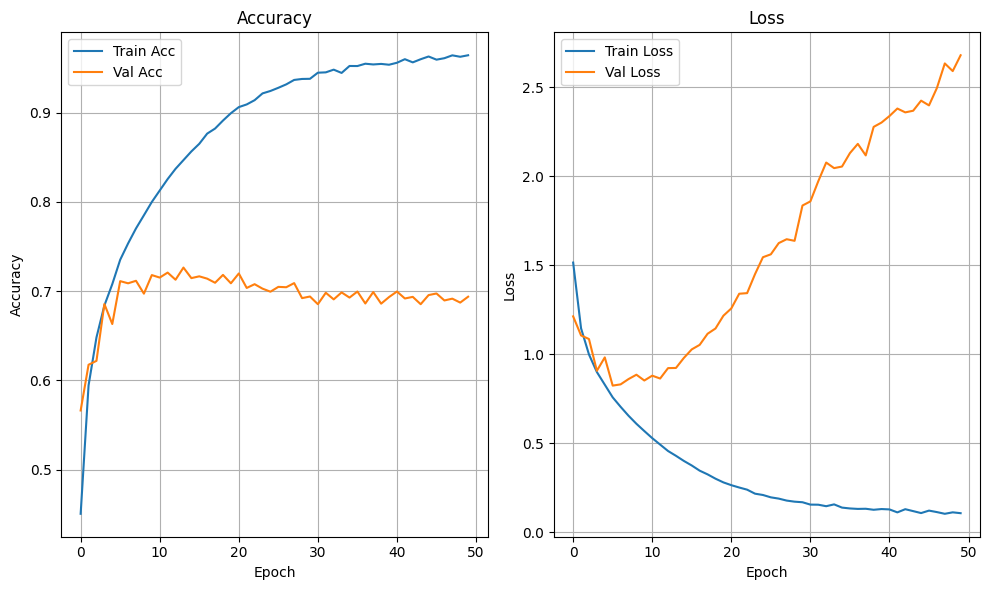

In [33]:
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


<Figure size 1000x800 with 0 Axes>

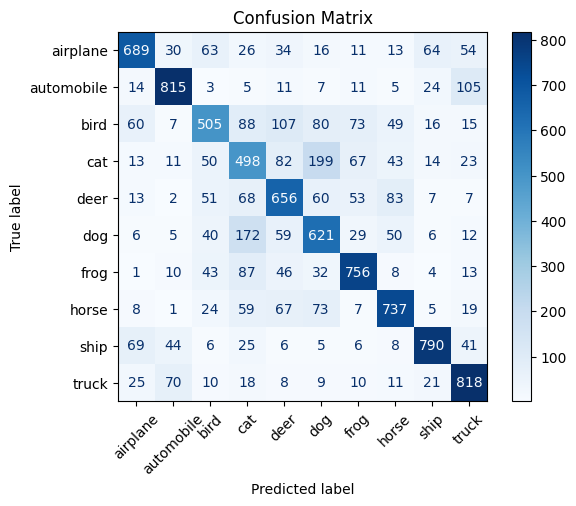

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predicted labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Flatten true labels
y_true = y_test.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [35]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    airplane       0.77      0.69      0.73      1000
  automobile       0.82      0.81      0.82      1000
        bird       0.64      0.51      0.56      1000
         cat       0.48      0.50      0.49      1000
        deer       0.61      0.66      0.63      1000
         dog       0.56      0.62      0.59      1000
        frog       0.74      0.76      0.75      1000
       horse       0.73      0.74      0.73      1000
        ship       0.83      0.79      0.81      1000
       truck       0.74      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



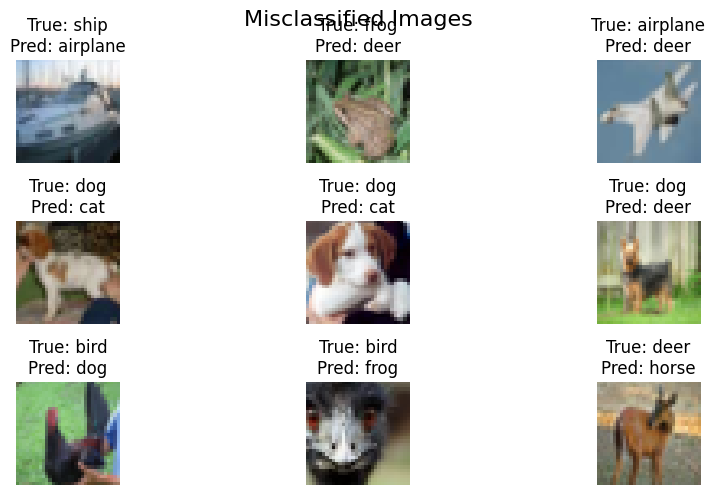

In [36]:
# Find misclassified indexes
misclassified_idx = np.where(y_pred_classes != y_true)[0]

# Plot first 9 misclassified images
plt.figure(figsize=(10, 5))
for i in range(9):
    idx = misclassified_idx[i]
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Misclassified Images", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


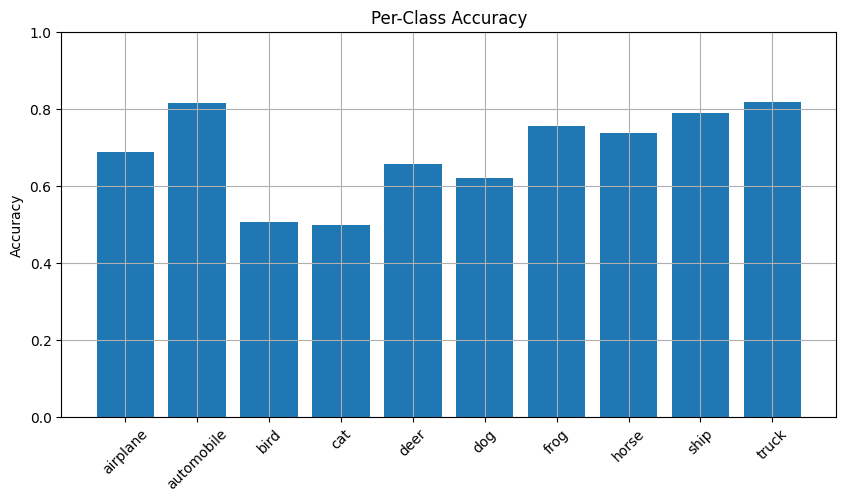

In [37]:
correct_per_class = np.zeros(10)
total_per_class = np.zeros(10)

for i in range(len(y_true)):
    label = y_true[i]
    pred = y_pred_classes[i]
    if label == pred:
        correct_per_class[label] += 1
    total_per_class[label] += 1

accuracy_per_class = correct_per_class / total_per_class

# Plot
plt.figure(figsize=(10, 5))
plt.bar(class_names, accuracy_per_class)
plt.title("Per-Class Accuracy")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


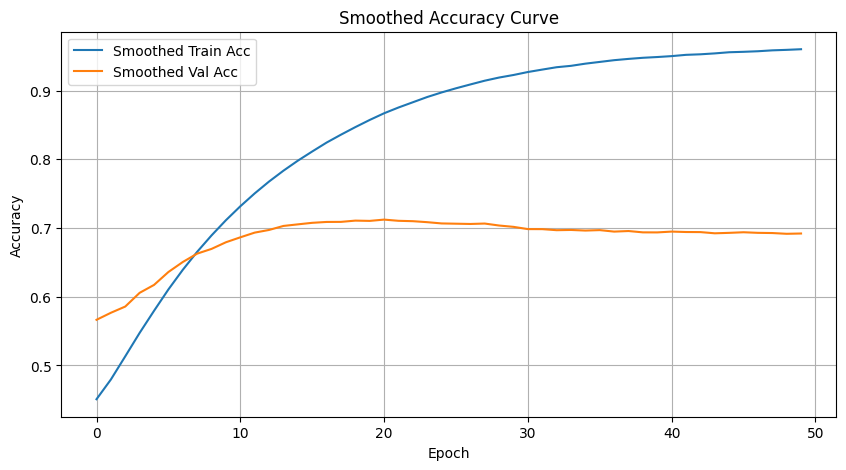

In [38]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            smoothed.append(smoothed[-1] * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

plt.figure(figsize=(10, 5))
plt.plot(smooth_curve(history.history['accuracy']), label='Smoothed Train Acc')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Smoothed Val Acc')
plt.title("Smoothed Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
